In [6]:
from math import sqrt

from sklearn.metrics import mean_squared_error
import functions as covid_lib

In [7]:
baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
cumulated_confirmed_url = baseURL + "time_series_covid19_confirmed_global.csv" 
cumulated_confirmed     = pd.read_csv(cumulated_confirmed_url)

<IPython.core.display.Javascript object>

In [8]:
US_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()
total_cases, increased_case = covid_lib.df_to_timeseries(US_confirmed, 7)


/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Test RMSE: 26.801


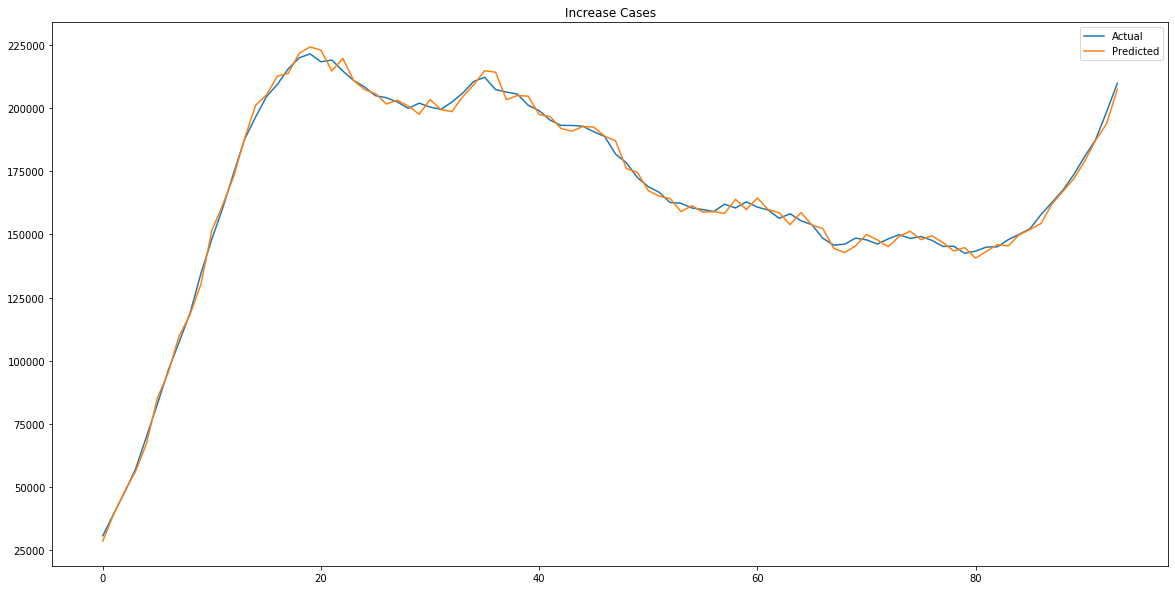

In [12]:

increase_temp = increased_case.values 
predictions_increase, model_increase = covid_lib.SARIMA_PREDICT_edit(increase_temp, "Increase Cases",  is_increase_case = True, fit_param = (True,True) )


### The accuracy for prediction for one day is pretty accurate giving the information from yesterday, however if it were to predict the next 14 days it would have subpar accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

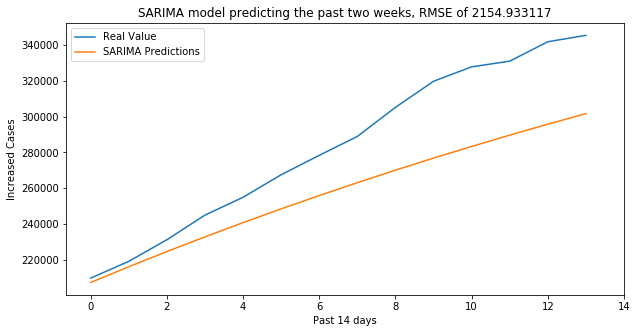

In [15]:
real_value = increase_temp[-15:-1]

temp = model_increase.forecast(14)
rmse = sqrt(mean_squared_error(real_value, temp)) / len(real_value)
# print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(10,5))
plt.plot(real_value)
plt.plot(temp)
plt.title("SARIMA model predicting the past two weeks, RMSE of %3f" %rmse )
plt.legend(["Real Value" , "SARIMA Predictions"])
plt.xlabel("Past 14 days")
plt.ylabel("Increased Cases")
plt.xticks(np.arange(0, 15, 2)) 
plt.savefig("SARIMA Initial Predictions.png")

As we observe the model as it was only trained to the date two weeks ago from today, it has a bad accuracy <br>
To Solve this we try to use other models and even my own design of boosting to resolve this issue<br>
This plot will be my main metric for observing the result of my model. <br>
